In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.datasets import cifar100
import matplotlib.pyplot as plt
import keras


In [2]:
(train_images, train_labels),(test_images, test_labels) = cifar100.load_data()

169001437/169001437 [==============================] - 4s 0us/step


In [3]:
train_images.shape

(50000, 32, 32, 3)

In [4]:
np.unique(train_labels)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [5]:
labels = ["apple", "aquarium_fish", "baby", "bear", "beaver", "bed", "bee", "beetle", "bicycle", "bottle", "bowl", "boy", "bridge", "bus", "butterfly", "camel", "can", "castle", "caterpillar", "cattle", "chair", "chimpanzee", "clock", "cloud", "cockroach", "couch", "cra", "crocodile", "cup", "dinosaur", "dolphin", "elephant", "flatfish", "forest", "fox", "girl", "hamster", "house", "kangaroo", "keyboard", "lamp", "lawn_mower", "leopard", "lion", "lizard", "lobster", "man", "maple_tree", "motorcycle", "mountain", "mouse", "mushroom", "oak_tree", "orange", "orchid", "otter", "palm_tree", "pear", "pickup_truck", "pine_tree", "plain", "plate", "poppy", "porcupine", "possum", "rabbit", "raccoon", "ray", "road", "rocket", "rose", "sea", "seal", "shark", "shrew", "skunk", "skyscraper", "snail", "snake", "spider", "squirrel", "streetcar", "sunflower", "sweet_pepper", "table", "tank", "telephone", "television", "tiger", "tractor", "train", "trout", "tulip", "turtle", "wardrobe", "whale", "willow_tree", "wolf", "woman", "worm"]

In [6]:
len(labels)

100

In [7]:
img = train_images[0]

In [8]:
img.shape

(32, 32, 3)

In [9]:
train_labels[0]

array([19])

In [10]:
labels[19]

'cattle'

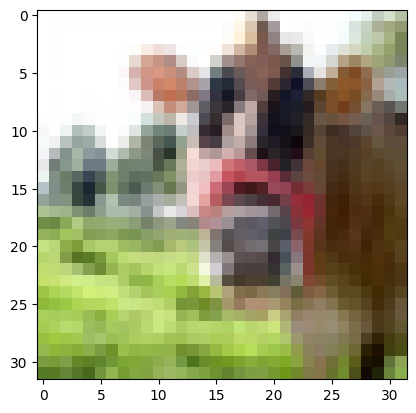

In [11]:
plt.imshow(img)

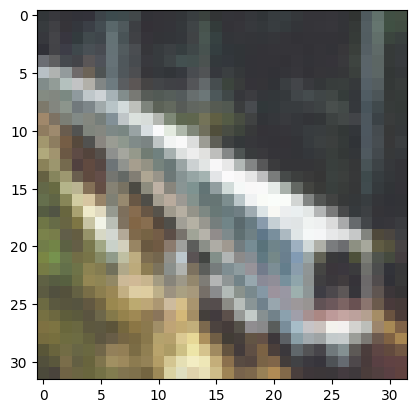

In [12]:
plt.imshow(train_images[6])

In [13]:
train_labels[6]

array([90])

In [14]:
labels[90]

'train'

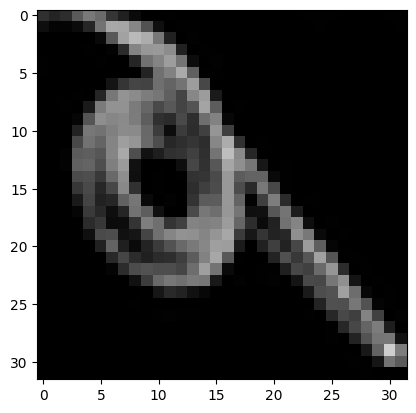

In [15]:
plt.imshow(train_images[97])

In [16]:
train_labels[97]

array([99])

In [17]:
j = 0
for i in train_labels:

  if i == 99:
    print(i,' - ', j)
    break
  j += 1


[99]  -  97


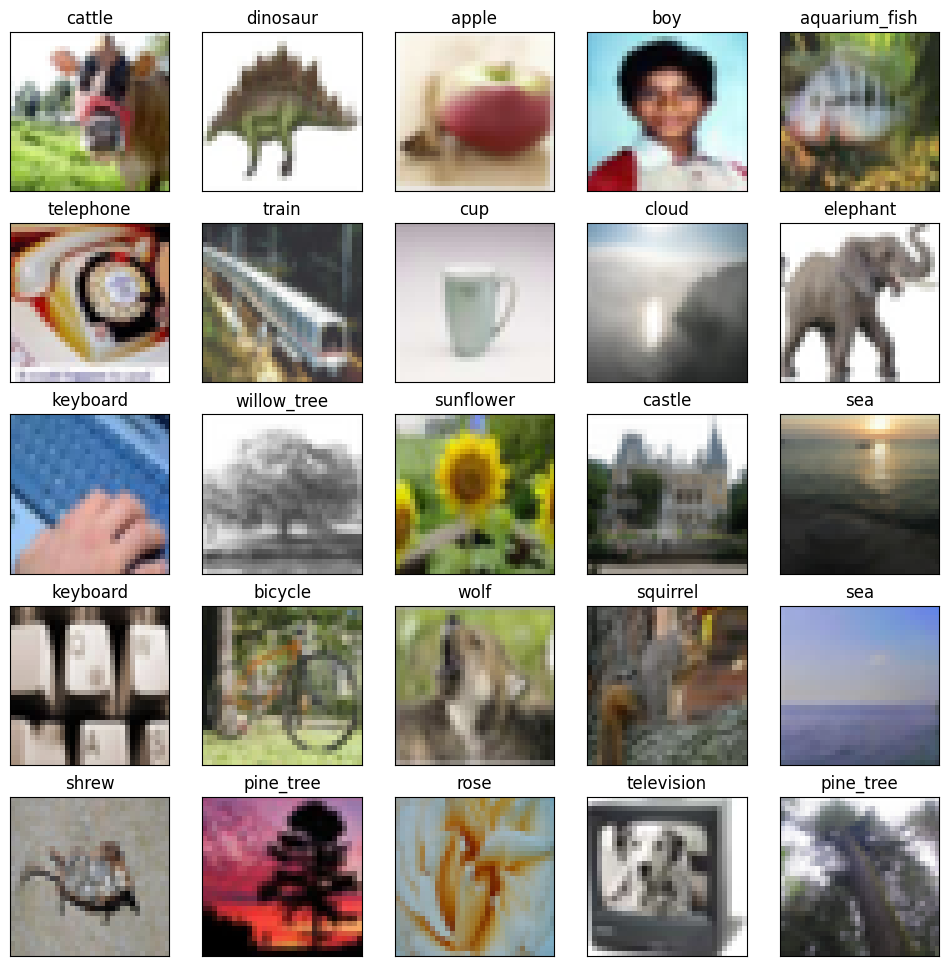

In [18]:
plt.figure(figsize=(12,12))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.title(labels[int(train_labels[i])])
  plt.imshow(train_images[i])

In [19]:
train_ds = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
test_ds = tf.data.Dataset.from_tensor_slices((test_images, test_labels))

In [20]:
train_ds

<_TensorSliceDataset element_spec=(TensorSpec(shape=(32, 32, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [21]:
def process_image(image, label):
  image = tf.image.per_image_standardization(image)
  image = tf.image.resize(image,(64,64))
  return image,label

In [22]:
train_ds_size = tf.data.experimental.cardinality(train_ds).numpy()
test_ds_size = tf.data.experimental.cardinality(test_ds).numpy()
print('Train size:', train_ds_size)
print('Test size:', test_ds_size)

Train size: 50000
Test size: 10000


In [23]:
train_ds = (train_ds.map(process_image).shuffle(buffer_size=train_ds_size).batch(batch_size = 32,drop_remainder=True))

test_ds = (test_ds.map(process_image).shuffle(buffer_size=test_ds_size).batch(batch_size = 32,drop_remainder=True))

In [24]:
train_ds

<_BatchDataset element_spec=(TensorSpec(shape=(32, 64, 64, 3), dtype=tf.float32, name=None), TensorSpec(shape=(32, 1), dtype=tf.int64, name=None))>

In [25]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters = 128, kernel_size = (11,11),strides = (4,4), activation = 'relu', input_shape=(64,64,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters = 256, kernel_size = (5,5),strides = (1,1), activation = 'relu', padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3)),
    keras.layers.Conv2D(filters = 256, kernel_size = (3,3),strides = (1,1), activation = 'relu', padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters = 256, kernel_size = (1,1),strides = (1,1), activation = 'relu', padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters = 256, kernel_size = (1,1),strides = (1,1), activation = 'relu', padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(1024, activation = 'relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1024, activation = 'relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(100, activation = 'softmax')
    ])

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 128)       46592     
                                                                 
 batch_normalization (Batch  (None, 14, 14, 128)       512       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 7, 7, 128)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 256)         819456    
                                                                 
 batch_normalization_1 (Bat  (None, 7, 7, 256)         1024      
 chNormalization)                                                
                                                        

In [27]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = tf.optimizers.SGD(learning_rate = 0.001), metrics = ['accuracy'])

In [ ]:
history = model.fit(train_ds, epochs = 30, validation_data = test_ds)

Epoch 1/30
1562/1562 [==============================] - 26s 9ms/step - loss: 4.7745 - accuracy: 0.0212 - val_loss: 4.3008 - val_accuracy: 0.0658
Epoch 2/30
1562/1562 [==============================] - 17s 8ms/step - loss: 4.4197 - accuracy: 0.0458 - val_loss: 4.1452 - val_accuracy: 0.0948
Epoch 3/30
1562/1562 [==============================] - 28s 13ms/step - loss: 4.2699 - accuracy: 0.0638 - val_loss: 4.0213 - val_accuracy: 0.1172
Epoch 4/30
1562/1562 [==============================] - 17s 8ms/step - loss: 4.1489 - accuracy: 0.0784 - val_loss: 3.8914 - val_accuracy: 0.1331
Epoch 5/30
1562/1562 [==============================] - 17s 9ms/step - loss: 4.0521 - accuracy: 0.0920 - val_loss: 3.7935 - val_accuracy: 0.1501
Epoch 6/30
1562/1562 [==============================] - 16s 8ms/step - loss: 3.9600 - accuracy: 0.1062 - val_loss: 3.6956 - val_accuracy: 0.1642
Epoch 7/30
1562/1562 [==============================] - 17s 9ms/step - loss: 3.8773 - accuracy: 0.1167 - val_loss: 3.6164 - val_a